In [63]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import itertools
from itertools import permutations
from tensorflow import keras


# Top k-Ranking 

class MAB:
    rewards = []
    def __init__(self, arms_len):
        self.arms_len = arms_len
        self.rewards = []
        self.arms_expectation = np.zeros(self.arms_len)
        self.arms_expectation_counts = np.zeros(self.arms_len)
        
    def choose_arm(self, context):
                
        max_expect_arm = -1*np.Inf
        max_expect_arm_index = np.NAN
        for i in range(self.arms_len):
            if self.arms_expectation[i]/self.arms_expectation_counts[i] > max_expect_arm:
                max_expect_arm = self.arms_expectation[i]/self.arms_expectation_counts[i]
                max_expect_arm_index = i
                
        if np.isnan(max_expect_arm_index):
            return np.random.randint(0,high=self.arms_len)
        else:
            return max_expect_arm_index
            
                
        if 0 <= context and context <= self.arms_len-1:
            return context
        else:
            return np.random.randint(0,high=self.arms_len)

    def set_reward(self, context, arm, reward):
        arm = int(arm)
        self.rewards.append((context, arm, reward))
        self.arms_expectation[arm] += reward
        self.arms_expectation_counts[arm] += 1

MAB = MAB(10)

max_error = 9

def get_ranking(k, context, history):

    # context is user and/or search string

    choosen_arms = np.zeros(arms_len)
    ranking = np.zeros(k)

    for i in range(k):
        ranking[i] = MAB(np.concatenate(context,choosen_arms), history) # chooses an arm from the context 

        choosen_arms[ranking[i]] = 1

    return ranking


C:\Users\Micha\anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


[2.00000e+00 9.00000e+00 1.20000e+01 ... 1.88260e+05 1.88261e+05
 1.88262e+05]


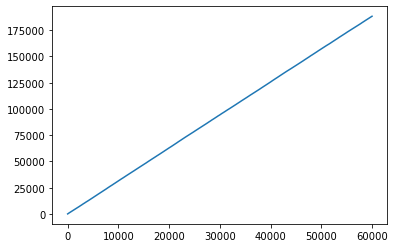

In [64]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

regret = np.zeros(np.shape(x_train)[0])

x_train = np.zeros(np.shape(x_train)[0])

for i in range(np.shape(x_train)[0]):
    if i > np.shape(x_train)[0]/2:
        x_train[i] = y_train[i] + np.random.randint(-1,high=2,size=1)
    else:
        x_train[i] = y_train[i]

for i in range(np.shape(x_train)[0]):
    arm = MAB.choose_arm(x_train[i])
    error = np.absolute(arm - y_train[i])
    reward = max_error - error
    MAB.set_reward(x_train[i], arm, reward)
    if i>0:
        regret[i] = max_error - reward + regret[i-1]
    else:
        regret[i] = max_error - reward

print(regret)

plt.plot(regret)
plt.show()
